In [1]:
import numpy as np
import pandas as pd
import datetime
import os

In [2]:
#read data
#make the path
binance_1h = os.path.join('historical_data' , 'binance' , '1H.csv')
#read csv
source = pd.read_csv(binance_1h)
df = source.copy()
#set date and index
df['Date'] = pd.to_datetime(source['Date'], format='%Y-%m-%d %H:%M:%S')
df.set_index('Date', inplace=True)

In [3]:
df

,Open,High,Low,Close,Volume,Numtr
Date,,,,,,
2017-09-05 00:00:00,4100.11,4116.08,3901.02,3999.99,74.037776,514.0
2017-09-05 01:00:00,3956.58,4121.33,3620.00,3620.00,99.245286,567.0
2017-09-05 02:00:00,3659.50,4054.15,3603.00,4054.11,53.837624,623.0
2017-09-05 03:00:00,4054.11,4071.83,3943.11,3988.04,59.367200,644.0
2017-09-05 04:00:00,3996.24,4070.38,3943.10,4038.01,38.124178,333.0
...,...,...,...,...,...,...
2021-06-01 05:00:00,36748.02,37350.00,36710.40,37266.55,2603.445266,55850.0
2021-06-01 06:00:00,37264.66,37443.72,36710.19,36915.32,3002.411865,83909.0
2021-06-01 07:00:00,36917.60,37171.09,36638.71,36831.58,2722.383175,88793.0


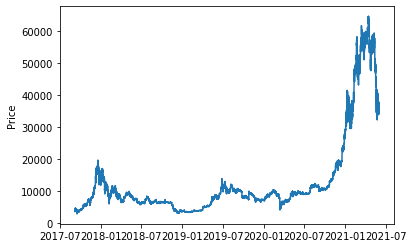

In [4]:
import matplotlib.pyplot as plt
##plot close price
plt.plot(df['Close'])
plt.ylabel('Price')
plt.show()


In [5]:
# review a part of dataset
df['Close'][32000:32500]

Date
2021-04-30 08:00:00    54526.61
2021-04-30 09:00:00    54318.08
2021-04-30 10:00:00    54164.67
2021-04-30 11:00:00    54230.63
2021-04-30 12:00:00    54655.81
                         ...   
2021-05-20 23:00:00    40526.64
2021-05-21 00:00:00    41725.59
2021-05-21 01:00:00    41429.68
2021-05-21 02:00:00    41248.33
2021-05-21 03:00:00    40666.91
Name: Close, Length: 500, dtype: float64

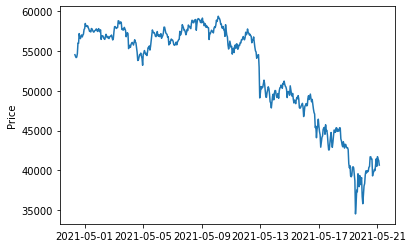

In [6]:
# plot close price from 2021-04-30 08:00:00 to 2021-05-21 03:00:00
plt.plot(df['Close'][32000:32500])
plt.ylabel('Price')
plt.show()

In [7]:
##find null data in Close column
df['close_null_checker'] = np.where(pd.isnull(df.Close),1,0)
df


,Open,High,Low,Close,Volume,Numtr,close_null_checker
Date,,,,,,,
2017-09-05 00:00:00,4100.11,4116.08,3901.02,3999.99,74.037776,514.0,0
2017-09-05 01:00:00,3956.58,4121.33,3620.00,3620.00,99.245286,567.0,0
2017-09-05 02:00:00,3659.50,4054.15,3603.00,4054.11,53.837624,623.0,0
2017-09-05 03:00:00,4054.11,4071.83,3943.11,3988.04,59.367200,644.0,0
2017-09-05 04:00:00,3996.24,4070.38,3943.10,4038.01,38.124178,333.0,0
...,...,...,...,...,...,...,...
2021-06-01 05:00:00,36748.02,37350.00,36710.40,37266.55,2603.445266,55850.0,0
2021-06-01 06:00:00,37264.66,37443.72,36710.19,36915.32,3002.411865,83909.0,0
2021-06-01 07:00:00,36917.60,37171.09,36638.71,36831.58,2722.383175,88793.0,0


In [8]:
# sum > 0 means there are some null data in our data set which we need to fix it. 
sum(df.close_null_checker)

0

In [9]:
## function sma on close
def add_sma_to_dataframe (df):
    #####sma9
    df['sma9'] = df.Close.rolling(window=9).mean()
    #####sma20
    df['sma20'] = df.Close.rolling(window=20).mean()
    #####sma50
    df['sma50'] = df.Close.rolling(window=50).mean()
    #####sma200
    df['sma200'] = df.Close.rolling(window=200).mean()

    return(df)

In [10]:
## add sma9 sma20 sma50 and sma200 to data frame
df = add_sma_to_dataframe(df)
df

,Open,High,Low,Close,Volume,Numtr,close_null_checker,sma9,sma20,sma50,sma200
Date,,,,,,,,,,,
2017-09-05 00:00:00,4100.11,4116.08,3901.02,3999.99,74.037776,514.0,0,NaN,NaN,NaN,NaN
2017-09-05 01:00:00,3956.58,4121.33,3620.00,3620.00,99.245286,567.0,0,NaN,NaN,NaN,NaN
2017-09-05 02:00:00,3659.50,4054.15,3603.00,4054.11,53.837624,623.0,0,NaN,NaN,NaN,NaN
2017-09-05 03:00:00,4054.11,4071.83,3943.11,3988.04,59.367200,644.0,0,NaN,NaN,NaN,NaN
2017-09-05 04:00:00,3996.24,4070.38,3943.10,4038.01,38.124178,333.0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-06-01 05:00:00,36748.02,37350.00,36710.40,37266.55,2603.445266,55850.0,0,37070.010000,36935.7150,36089.5568,37026.69610
2021-06-01 06:00:00,37264.66,37443.72,36710.19,36915.32,3002.411865,83909.0,0,37068.095556,36937.3335,36132.8284,37042.10885
2021-06-01 07:00:00,36917.60,37171.09,36638.71,36831.58,2722.383175,88793.0,0,37062.801111,36937.0895,36162.9478,37052.99050


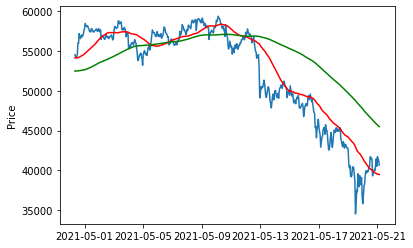

In [11]:
# plot close price and sma from 2021-04-30 08:00:00 to 2021-05-21 03:00:00
plt.plot(df['Close'][32000:32500])
plt.plot(df['sma50'][32000:32500],'red')
plt.plot(df['sma200'][32000:32500],'green')
plt.ylabel('Price')
plt.show()

In [12]:
# function to plot histogram
def plt_hist(x,n_bins=100):
    plt.hist(x, bins=n_bins)


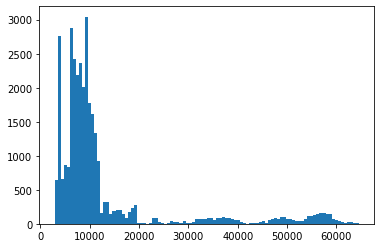

In [13]:
## Close Histogram
plt_hist(df['Close'])

In [14]:
# remove the first 200 rows to remove the null sma
df = df.iloc[200:].copy()
df

,Open,High,Low,Close,Volume,Numtr,close_null_checker,sma9,sma20,sma50,sma200
Date,,,,,,,,,,,
2017-09-13 08:00:00,3933.76,3945.01,3866.01,3938.24,19.977237,162.0,0,3987.737778,4105.0065,4190.4392,4315.71390
2017-09-13 09:00:00,3938.69,3970.00,3867.50,3965.91,24.592419,139.0,0,3969.620000,4090.3300,4186.1828,4317.44345
2017-09-13 10:00:00,3965.91,3965.91,3820.02,3820.02,54.895125,135.0,0,3939.157778,4067.6805,4179.2508,4316.27300
2017-09-13 11:00:00,3820.02,3923.93,3820.00,3832.00,36.568695,369.0,0,3917.935556,4046.3445,4172.6968,4315.49280
2017-09-13 12:00:00,3831.01,3940.01,3796.80,3904.99,89.046526,746.0,0,3914.396667,4027.5945,4167.2718,4314.82770
...,...,...,...,...,...,...,...,...,...,...,...
2021-06-01 05:00:00,36748.02,37350.00,36710.40,37266.55,2603.445266,55850.0,0,37070.010000,36935.7150,36089.5568,37026.69610
2021-06-01 06:00:00,37264.66,37443.72,36710.19,36915.32,3002.411865,83909.0,0,37068.095556,36937.3335,36132.8284,37042.10885
2021-06-01 07:00:00,36917.60,37171.09,36638.71,36831.58,2722.383175,88793.0,0,37062.801111,36937.0895,36162.9478,37052.99050


In [15]:
# make a new data frame for features
data = []
feature = pd.DataFrame(data, columns = ['diff_close_sma20'])
feature['diff_close_sma20'] = df.Close - df.sma20
feature

,diff_close_sma20
Date,
2017-09-13 08:00:00,-166.7665
2017-09-13 09:00:00,-124.4200
2017-09-13 10:00:00,-247.6605
2017-09-13 11:00:00,-214.3445
2017-09-13 12:00:00,-122.6045
...,...
2021-06-01 05:00:00,330.8350
2021-06-01 06:00:00,-22.0135
2021-06-01 07:00:00,-105.5095


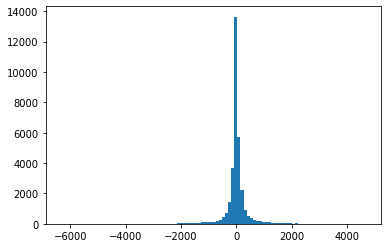

In [16]:
#plot histogram diff_close_sma20
plt_hist(feature['diff_close_sma20'])

In [17]:
#Changing diff_close_sma20 to the ratio of the change, not the exact changes.
feature['diff_close_sma20'] = (df.Close - df.sma20)/df.Close
feature

,diff_close_sma20
Date,
2017-09-13 08:00:00,-0.042345
2017-09-13 09:00:00,-0.031372
2017-09-13 10:00:00,-0.064832
2017-09-13 11:00:00,-0.055935
2017-09-13 12:00:00,-0.031397
...,...
2021-06-01 05:00:00,0.008878
2021-06-01 06:00:00,-0.000596
2021-06-01 07:00:00,-0.002865


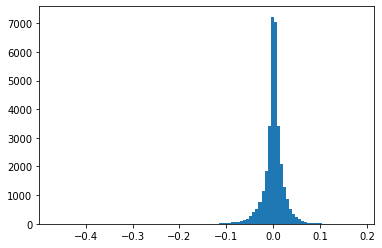

In [18]:
# plot histogram
plt_hist(feature['diff_close_sma20'])

In [19]:
# add diff_close_sma200 as new feature in a same way
feature['diff_close_sma200'] = (df.Close - df.sma200)/df.Close
feature

,diff_close_sma20,diff_close_sma200
Date,,
2017-09-13 08:00:00,-0.042345,-0.095848
2017-09-13 09:00:00,-0.031372,-0.088639
2017-09-13 10:00:00,-0.064832,-0.129908
2017-09-13 11:00:00,-0.055935,-0.126172
2017-09-13 12:00:00,-0.031397,-0.104952
...,...,...
2021-06-01 05:00:00,0.008878,0.006436
2021-06-01 06:00:00,-0.000596,-0.003435
2021-06-01 07:00:00,-0.002865,-0.006011


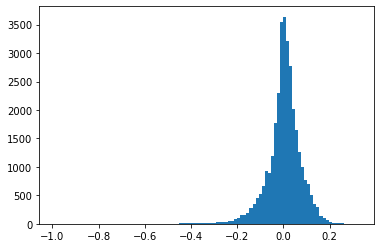

In [20]:
#plot histogram
plt_hist(feature['diff_close_sma200'])

<AxesSubplot:>

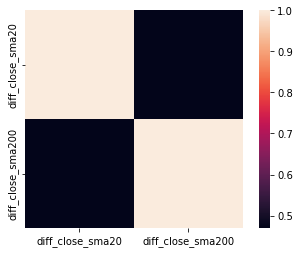

In [21]:
import seaborn as sns

#plot Correlation
sns.heatmap(feature.corr() , square=True)

In [22]:
# more statistics about a column (diff_close_sma200)

print(feature.diff_close_sma200.describe())

count    32570.000000
mean         0.002541
std          0.075107
min         -0.989773
25%         -0.028190
50%          0.006389
75%          0.043168
max          0.327594
Name: diff_close_sma200, dtype: float64


In [23]:
##add diff_close_sma50 to feature dataset 
feature['diff_close_sma50'] = (df.Close - df.sma50)/df.Close

# create target: 1: if diff_close_sma50 > 0 and 0: if diff_close_sma50 < 0
feature['target'] = np.where(feature.diff_close_sma50 > 0,1,0)
feature



,diff_close_sma20,diff_close_sma200,diff_close_sma50,target
Date,,,,
2017-09-13 08:00:00,-0.042345,-0.095848,-0.064039,0
2017-09-13 09:00:00,-0.031372,-0.088639,-0.055542,0
2017-09-13 10:00:00,-0.064832,-0.129908,-0.094039,0
2017-09-13 11:00:00,-0.055935,-0.126172,-0.088908,0
2017-09-13 12:00:00,-0.031397,-0.104952,-0.067166,0
...,...,...,...,...
2021-06-01 05:00:00,0.008878,0.006436,0.031583,1
2021-06-01 06:00:00,-0.000596,-0.003435,0.021197,1
2021-06-01 07:00:00,-0.002865,-0.006011,0.018154,1


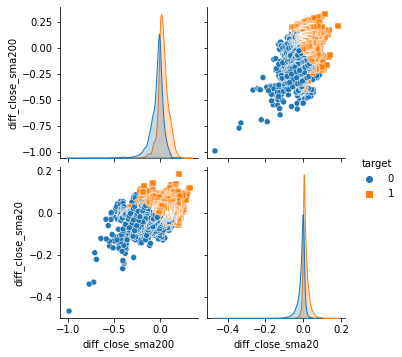

In [24]:

# plot pairplot with target 
sns.pairplot(feature[[ "diff_close_sma200","diff_close_sma20" , "target" ]], diag_kind="kde" ,hue='target' , markers=["o", "s"])